# D1
-------
Forhold vs. avvik
Den beregnede kolonnen Forhold_STOPP_WLTP er direkte relatert til avviket: et lavt forhold gir et høyt negativt avvik. Dette gir et mer intuitivt mål på hvor stor forskjellen faktisk er – f.eks. "bilen leverte bare 80 prosent av det den lovet."

Tukling med y-akser?
Ved å inkludere eller ekskludere origo i regresjonsplottet kan inntrykket av modellen endres. Uten origo kan det se ut som modellen passer data bedre enn den faktisk gjør – dette kan være en form for «tukling med y-aksen». Derfor har vi vist begge.

Holder leverandørene det de lover?
Basert på regresjonen og forholdstallene ser vi at ingen av bilene nådde den oppgitte WLTP-rekkevidden i vintertesten. Det er systematiske avvik nedover for samtlige modeller. Det kan derfor ikke påstås med høy sannsynlighet at leverandørene holder det de lover under norske vinterforhold.

Gjennomsnittlig avvik
Det gjennomsnittlige avviket i datasettet var:
-19.07 prosent

Dette betyr at en gjennomsnittlig elbil i testen leverte omtrent -19.07 prosent kortere rekkevidde enn oppgitt.





# D2
-----

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import requests
from io import StringIO



In [ ]:

url = "http://motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132"
response = requests.get(url, verify=False)
html_content = response.text
tables = pd.read_html(StringIO(html_content))

for i, t in enumerate(tables):
    print(f"Tabell {i}: {t.columns}")

df = tables[0]
df.head()

Tabell 0: Index(['Modell (temp. varierte fra 0° til -10°)', 'WLTP-tall', 'STOPP',
       'Avvik'],
      dtype='object')
Tabell 1: Index(['Modell (ute-temp. ved start +0°)', '550 km (-10°)', '500 km (-1°)',
       '450 km (-1°)', '400 km (-2°)', '350 km (-2°)', '300 km (-5°)',
       '250 km (-8°)', '200 km (-6°)', '150 km (-5°)', '100 km (-0°)',
       '50 km (-8°)'],
      dtype='object')


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.motor.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,Modell (temp. varierte fra 0° til -10°),WLTP-tall,STOPP,Avvik
0,Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
1,Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
2,BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
3,Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
4,Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"


In [ ]:

print(df.columns)

df.columns = ['Bilmodell', 'WLTP', 'STOP', 'Avvik', 'Extra1', 'Extra2']
df = df.dropna()
df[['WLTP_km', 'WLTP_kWt_per_100km']] = df['WLTP'].str.extract(r'(\d+)\s*km\s*/\s*([\d,]+)').copy()
df['WLTP_km'] = df['WLTP_km'].astype(int)
df['WLTP_kWt_per_100km'] = df['WLTP_kWt_per_100km'].str.replace(',', '.').astype(float)
df['STOP'] = df['STOP'].str.extract(r'(\d+)').fillna(0).astype(int)
df['Avvik_prosent'] = df['Avvik'].str.replace(',', '.').str.extract(r'(-?\d+\.\d+)').astype(float)
df['STOP_WLTP_ratio'] = df['STOP'] / df['WLTP_km']

Index(['Bilmodell', 'WLTP', 'STOP', 'Avvik', 'WLTP_km', 'WLTP_kWt_per_100km'], dtype='object')


In [ ]:

X = df[['WLTP_km']]
y = df['STOP']

model = LinearRegression()
model.fit(X, y)

a = model.coef_[0]
b = model.intercept_
print(f"Regresjonsmodell: f(x) = {a:.2f}x + {b:.2f}")


Regresjonsmodell: f(x) = 0.97x + -95.04


In [23]:
gjennomsnitt_avvik = df['Avvik_prosent'].mean()
print(f"Gjennomsnittlig avvik: {gjennomsnitt_avvik:.2f} %")


Gjennomsnittlig avvik: -19.07 %


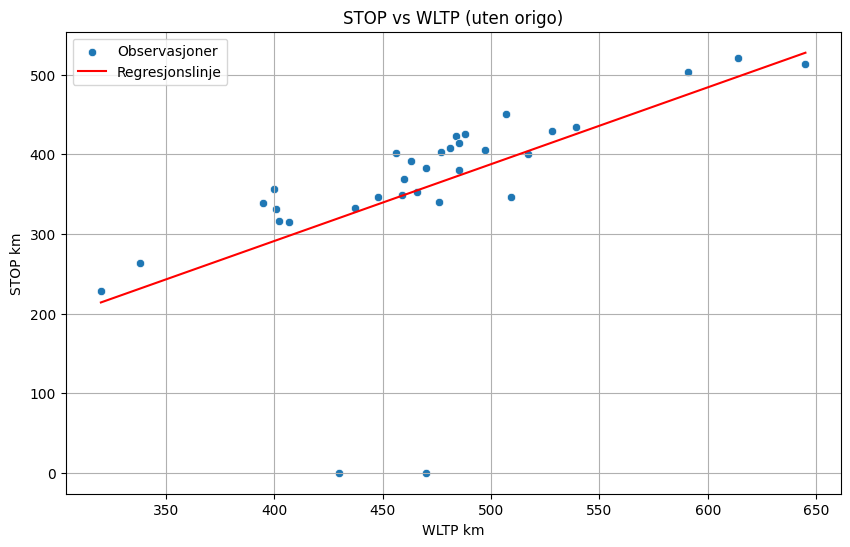

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['WLTP_km'], y=df['STOP'], label="Observasjoner")
x_vals = np.linspace(df['WLTP_km'].min(), df['WLTP_km'].max(), 100)
y_vals = a * x_vals + b
plt.plot(x_vals, y_vals, color="red", label="Regresjonslinje")
plt.xlabel("WLTP km")
plt.ylabel("STOP km")
plt.title("STOP vs WLTP (uten origo)")
plt.legend()
plt.grid(True)
plt.show()


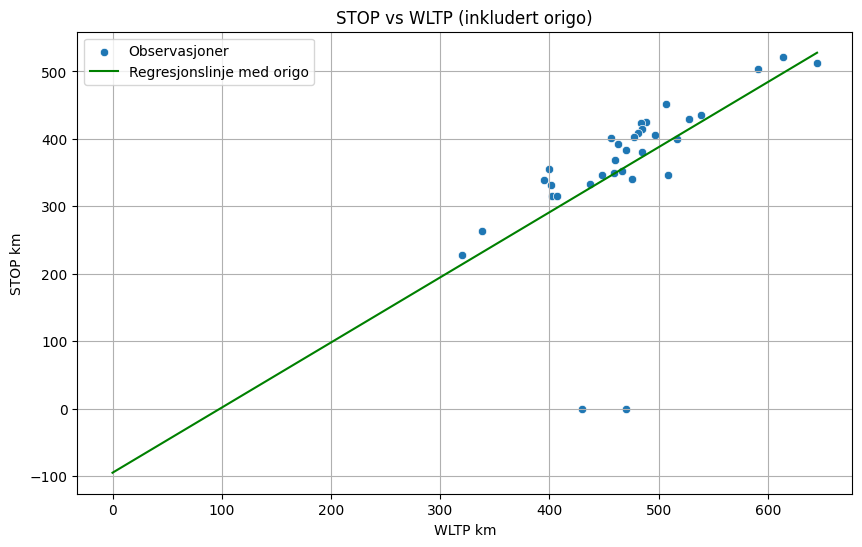

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['WLTP_km'], y=df['STOP'], label="Observasjoner")
x_vals = np.linspace(0, df['WLTP_km'].max(), 100)
y_vals = a * x_vals + b
plt.plot(x_vals, y_vals, color="green", label="Regresjonslinje med origo")
plt.xlabel("WLTP km")
plt.ylabel("STOP km")
plt.title("STOP vs WLTP (inkludert origo)")
plt.legend()
plt.grid(True)
plt.show()
